DATE        0
CPI         0
FEDfunds    0
dtype: int64
                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     187.4
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           1.35e-38
Time:                        06:33:27   Log-Likelihood:                -234.99
No. Observations:                 830   AIC:                             474.0
Df Residuals:                     828   BIC:                             483.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

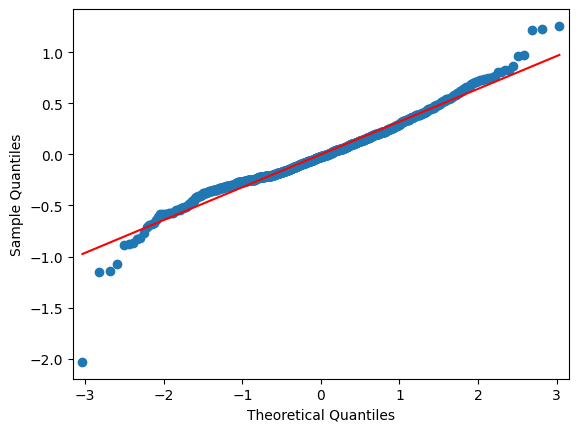

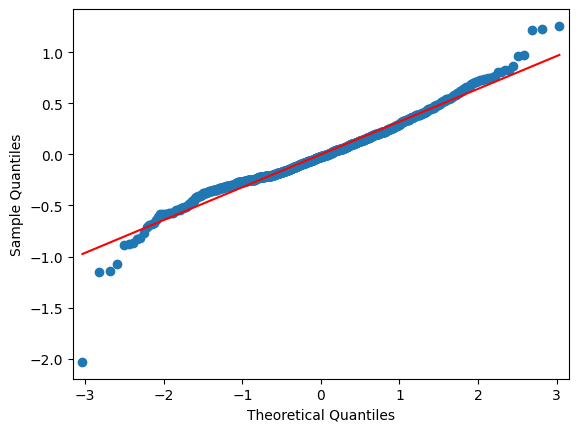

In [35]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.graphics.gofplots as sm
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import het_breuschpagan, het_goldfeldquandt
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

# Load your CSV data into a pandas DataFrame
#data = pd.read_csv("CPI Fedfunds monthly.csv")
data = pd.read_csv("/content/drive/MyDrive/CPI Fedfunds monthly.csv")
#remove rows with null values
data = data.dropna()
null_count = data.isnull().sum()
print(null_count)

# Define the model formula
model = "CPI ~ FEDfunds"

# Create the linear regression model
model_fit = smf.ols(formula=model, data=data).fit()

# Print the model summary
print(model_fit.summary())

# Generate QQ-plot of residuals
qqplot(model_fit.resid, line='s')  # 's' for fitted line
# Print the ANOVA table
#print(smf.anova_lm(model_fit, typ=2))

# Conduct Breusch-Pagan test
# bp_test = het_breuschpagan(model_fit.resid, model_fit.model)
# print("\nBreusch-Pagan Test for Heteroscedasticity:")
# print(bp_test)


In [36]:
# Extract the design matrix from the model
exog_het = model_fit.model.exog

# Conduct Breusch-Pagan test
bp_test = het_breuschpagan(model_fit.resid, exog_het, robust=False)

# Print the results
print("\nBreusch-Pagan Test for Heteroscedasticity:")
print(bp_test)

# we are unable to reject the null because p-values are high on


Breusch-Pagan Test for Heteroscedasticity:
(1.9146082613804083, 0.16645226278005332, 0.8096260909439276, 0.3684924283331523)


In [37]:
#Lets try to test for serial correlation

# Durbin-Watson statistic
dw_stat = durbin_watson(model_fit.resid)
print("\nDurbin-Watson Statistic:", dw_stat)

# Breusch-Godfrey test (for serial correlation of order 1)
bg_test = acorr_breusch_godfrey(model_fit, 1)
print("\nBreusch-Godfrey Test for Serial Correlation (Order 1):")
print(bg_test)


Durbin-Watson Statistic: 1.1101329099929784

Breusch-Godfrey Test for Serial Correlation (Order 1):
(163.98506995688356, 1.524134314802611e-37, 203.62254168320683, 1.8404281425791958e-41)


In [38]:
# Existing code (assuming your data is already loaded and cleaned)

# Define the model formula
model = "CPI ~ FEDfunds"

# Create the Newey-West corrected model (specifying maxlags=1)
nw_model1 = smf.ols(formula=model, data=data).fit(cov_type='HAC', cov_kwds={'maxlags': 1})

# Print the model summary with Newey-West standard errors
print("Newey-West Corrected Model Summary:")
print(nw_model1.summary())



Newey-West Corrected Model Summary:
                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     91.81
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           1.08e-20
Time:                        06:33:27   Log-Likelihood:                -234.99
No. Observations:                 830   AIC:                             474.0
Df Residuals:                     828   BIC:                             483.4
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0

In [39]:
# Newy west model 2
# Define the model formula
model = "CPI ~ FEDfunds"

# Create the Newey-West corrected model (specifying maxlags=1)
nw_model2 = smf.ols(formula=model, data=data).fit(cov_type='HAC', cov_kwds={'maxlags': 2})

# Print the model summary with Newey-West standard errors
print("Newey-West Corrected Model Summary:")
print(nw_model2.summary())


Newey-West Corrected Model Summary:
                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     72.06
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           9.58e-17
Time:                        06:33:27   Log-Likelihood:                -234.99
No. Observations:                 830   AIC:                             474.0
Df Residuals:                     828   BIC:                             483.4
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0

In [40]:
# Existing code (assuming your data is already loaded and cleaned)

# Define the model formula
model = "CPI ~ FEDfunds"

# Create the Newey-West corrected model (specifying maxlags=1)
nw_model3 = smf.ols(formula=model, data=data).fit(cov_type='HAC', cov_kwds={'maxlags': 3})

# Print the model summary with Newey-West standard errors
print("Newey-West Corrected Model Summary:")
print(nw_model3.summary())


Newey-West Corrected Model Summary:
                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     61.90
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           1.13e-14
Time:                        06:33:27   Log-Likelihood:                -234.99
No. Observations:                 830   AIC:                             474.0
Df Residuals:                     828   BIC:                             483.4
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0

In [41]:
#
#
#
#AR models
#
#
#

In [42]:
import yfinance as yf
from statsmodels.tsa.ar_model import AutoReg
import pandas as pd

# Download KO stock price data
data = yf.download("KO", start="2023-01-01", end="2024-06-16")

#lets focus on closing prices
Closing_prices = data["Close"]

#lets try to fit AutoReg model to Closing_prices
model = AutoReg(Closing_prices, lags=1)
results = model.fit()

# Print the model summary
print(results.summary())


[*********************100%%**********************]  1 of 1 completed

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                  365
Model:                     AutoReg(1)   Log Likelihood                -244.269
Method:               Conditional MLE   S.D. of innovations              0.473
Date:                Thu, 20 Jun 2024   AIC                            494.537
Time:                        06:33:27   BIC                            506.229
Sample:                             1   HQIC                           499.184
                                  365                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3244      0.651      2.036      0.042       0.049       2.599
Close.L1       0.9780      0.011     90.508      0.000       0.957       0.999
                                    Roots           


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [43]:
#lets try AutoRegression model on Monthly US sales Retail Data
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

data = pd.read_csv("/content/drive/MyDrive/Retail Sales Monthly.csv")
data.head()
# header name MRTSSM44000USN
#Fit AutoReg model on header "MRTSSM44000USN"
model = AutoReg(data["MRTSSM44000USN"], lags=11)
results = model.fit()

# Print the model summary
print(results.summary())


                            AutoReg Model Results                             
Dep. Variable:         MRTSSM44000USN   No. Observations:                  387
Model:                    AutoReg(11)   Log Likelihood               -4323.777
Method:               Conditional MLE   S.D. of innovations          23872.136
Date:                Thu, 20 Jun 2024   AIC                           8673.553
Time:                        06:33:28   BIC                           8724.638
Sample:                            11   HQIC                          8693.832
                                  387                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1710.0500   3776.654      0.453      0.651   -5692.056    9112.156
MRTSSM44000USN.L1      0.2302      0.051      4.474      0.000       0.129       0.331
MRTSSM44000USN.L2   

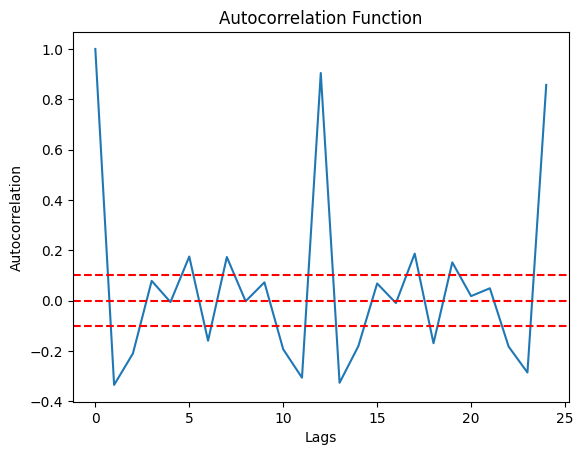

In [44]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import acf
import numpy as np

# Fit an AR(1) model to your time series data
model = AutoReg(data["MRTSSM44000USN"], lags = 1)

# Fit the model
model_fit = model.fit()

# Get the residuals from the fitted model
residuals = model_fit.resid

# Calculate the autocorrelations of the residuals
lags = 24  # Number of lags to check
acf_values = acf(residuals, nlags=lags)

# Plot the autocorrelations
import matplotlib.pyplot as plt
plt.plot(acf_values)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at zero
plt.axhline(y=2/np.sqrt(len(residuals)), color='r', linestyle='--')
plt.axhline(y=-2/np.sqrt(len(residuals)), color='r', linestyle='--')  # Add confidence intervals
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')
plt.show()


In [45]:
# from statsmodels.tsa.ar import AR
# from statsmodels.tsa.stattools import acf
# import pandas as pd  # Import pandas for creating the table

# # Fit an AR(1) model to your time series data
# model = AR(data)
# model_fit = model.fit()

# # Get the residuals from the fitted model
# residuals = model_fit.resid

# Calculate the autocorrelations and t-statistics of the residuals
lags = 24  # Number of lags to check
acf_results = acf(residuals, nlags=lags, alpha=0.05)  # Calculate with desired significance level
# print(acf_results)

#Labeling the columns
acf = acf_results[0][1:]  # Autocorrelation values from the first element (assuming indexing starts at 0)
t_stats = acf_results[1][1:, 0]  # t-statistics from the second element, first column (assuming indexing starts at 0)
lags = range(1, len(acf) + 1)  # Create a list of lags

# Create the DataFrame
df = pd.DataFrame({'Lag': lags, 'Autocorrelation': acf, 't-Statistic': t_stats})

# Print the DataFrame
print(df.to_string())

    Lag  Autocorrelation  t-Statistic
0     1        -0.334399    -0.434158
1     2        -0.209730    -0.320082
2     3         0.078890    -0.035361
3     4        -0.005257    -0.120048
4     5         0.175455     0.060661
5     6        -0.158927    -0.276359
6     7         0.173574     0.054020
7     8        -0.002065    -0.124101
8     9         0.073032    -0.049005
9    10        -0.192715    -0.315185
10   11        -0.305736    -0.431188
11   12         0.904361     0.771701
12   13        -0.325930    -0.509989
13   14        -0.180359    -0.370075
14   15         0.068475    -0.122939
15   16        -0.009157    -0.200815
16   17         0.187101    -0.004561
17   18        -0.168821    -0.362292
18   19         0.152302    -0.042630
19   20         0.018296    -0.177816
20   21         0.049419    -0.146711
21   22        -0.182293    -0.378546
22   23        -0.285157    -0.483088
23   24         0.857184     0.655206


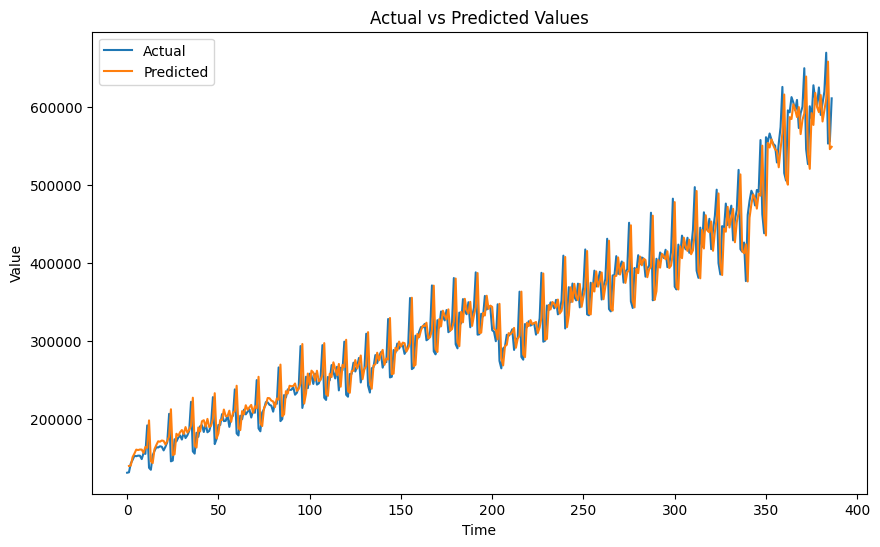

In [46]:
# prompt: lets create a plot of actual values vs predicted values by AR model

import matplotlib.pyplot as plt
# Create a plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(data["MRTSSM44000USN"], label="Actual")
plt.plot(model_fit.predict(), label="Predicted")
plt.title("Actual vs Predicted Values")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()
